# CREDIT CARD PERSONAS

# 0.Libraries needed for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# 1. Data Source
We will use a dataset obtained from Kaggle where we can understand the credit consumption from people.

**Variables in the dataset:**
* **CUSTID :** Identification of Credit Card holder (Categorical)
* **BALANCE :** Balance amount left in their account to make purchases (
* **BALANCEFREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES :** Amount of purchases made from account
* **ONEOFFPURCHASES :** Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES :** Amount of purchase done in installment
* **CASHADVANCE :** Cash in advance given by the user
* **PURCHASESFREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid
* **CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX :** Numbe of purchase transactions made
* **CREDITLIMIT :** Limit of Credit Card for user
* **PAYMENTS :** Amount of Payment done by user
* **MINIMUM_PAYMENTS :** Minimum amount of payments made by user
* **PRCFULLPAYMENT :** Percent of full payment paid by user
* **TENURE :** Tenure of credit card service for user

**Objective:** 
Understand the kind of personas we have through clustering the data. With this we will be able to know how to communicate with each group according to their own preferences and needs. We will be able to launch emails and campaigns according to each group needs. Later on, we will also be able to predict future clients as to which of these clusters they belong to as a forecast.



In [2]:
data= pd.read_csv("CCGENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# 2.Data processing

## 2.a.Descriptive Statistics of Data¶

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Data with many outliers. We need to remove those outliers as Kmeans is sensitive to them.

## 2.b.Data cleaning

### Missing values

One of the challenges faced when conducting EDA is that of missing data. When we are dealing with missing data values there are a few options we have, we can fill the missing values with a fixed value such as a mean, min, max. We could generate the value using the sample mean, standard deviation, and distribution type to provide an estimate for each of the missing values. A third option would be to just drop the rows with missing data 

https://towardsdatascience.com/random-forest-classification-678e551462f5#:~:text=Using%20Random%20Forest%20classification%20yielded,and%20without%20much%20parameter%20tuning.

In [5]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In those missing values, I´ll will put the mean of that variable:

In [6]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [7]:
data.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

### Due to many outliers, we will categorize variables

Dropping the cases would be not ideal as we would be missing value to try to understand consumption habits.

These are the final intervals chosen as the PERSONAS created made more sense, nonetheless there someothers created here considering the variability and mean from each variable. With these previous exercise, the INERTIA was lower with the same amount of clusters, but PERSONAS made a little less sense. To check this information out, please consult: http://localhost:8888/notebooks/OneDrive/Documentos/Tec%20Data%20Analytics%20Bootcamp/Proyecto/Intento7ProyectoBueno%20%20(18%20variables%20y%204%20clusters)%20rangos%20difernetes.ipynb

In [8]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

In [9]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [10]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [11]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

### Normalizing input values.
This is donde to avoid some variables having a bigger impact due to their scale in comparison to others.

In [12]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

## 3. Clustering with Kmeans

In [13]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

C:\Users\Karen\OneDrive\Python\Programs\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.


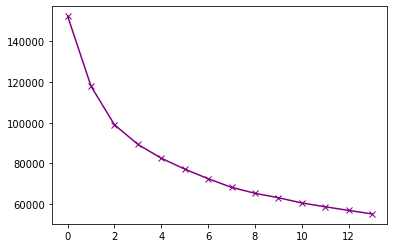

In [14]:
plt.plot(cost, 'bx-', color='purple')

I tried using 4,5, and 6 clusters.

Visually it seems that having 6 clusters made more sense according to the elbow algoritm. Anyhow I wanted to prioritize the creation of personas, and it  was a bit too detailed by using 6. Please consult this notebook for reference: http://localhost:8888/notebooks/OneDrive/Documentos/Tec%20Data%20Analytics%20Bootcamp/Proyecto/Intento4ProyectoBueno%20(18%20variables%20y%206%20clusters).ipynb

Therefore, I used 5 afterwards. Still I wasn´t able to explain clearly enough or simpler enough my personas. Please consult this notebook for reference: http://localhost:8888/notebooks/OneDrive/Documentos/Tec%20Data%20Analytics%20Bootcamp/Proyecto/Intento5Proyecto%20%20(18%20variables%20y%205%20clusters).ipynb

Finally, I decided to continue working with 4 personas, which made much more sense in my head and I was going to be able to direct communication much easier than if I had thought out of more detail information within more personas.

In [15]:
kmean= KMeans(4,random_state=5)
kmean.fit(X)
labels=kmean.labels_

In [16]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,9,2,0,1,0,0,1,1,0,1,0,2,1,1,1,0,3
1,12,10,0,0,0,3,3,4,0,0,0,5,5,4,3,0,1,1
2,12,10,10,10,0,0,0,3,2,2,0,0,5,2,2,3,0,2
3,12,7,1,1,0,1,0,3,3,3,0,1,5,0,2,1,1,3
4,12,10,1,1,0,0,0,2,1,1,0,0,3,2,1,1,0,3


In [18]:
clusters.to_csv('C:\\Users\\Karen\\OneDrive\\Documentos\\Tec Data Analytics Bootcamp\\Proyecto\\OUTPUT_WITH_4_PERSONAS_AND_CATEGORIES.csv')

In [19]:
data1= pd.read_csv("CCGENERAL.csv")

In [21]:
clusters1=pd.concat([data1, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,9,2,0,1,0,0,1,1,0,1,0,2,1,1,1,0,3
1,12,10,0,0,0,3,3,4,0,0,0,5,5,4,3,0,1,1
2,12,10,10,10,0,0,0,3,2,2,0,0,5,2,2,3,0,2
3,12,7,1,1,0,1,0,3,3,3,0,1,5,0,2,1,1,3
4,12,10,1,1,0,0,0,2,1,1,0,0,3,2,1,1,0,3


In [22]:
clusters1.to_csv('C:\\Users\\Karen\\OneDrive\\Documentos\\Tec Data Analytics Bootcamp\\Proyecto\\OUTPUT_WITH_4_PERSONAS.csv')

In [24]:
kmean.inertia_

89349.8901518026

The idea is to minimize the inertia (distance from observations to the centroid). I would have achieved this with a better result if I had used a diferent range of intervals to fit the data to avoid outliers, but this made the PERSONAS created made less sense.Therefore, even this is not the model with the best inertia, it´s the one that makes more sense for the study purpose.

In [65]:
#Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
kmean.n_iter_

35

In [66]:
#Number of observations per cluster
from collections import Counter
Counter(kmean.labels_)

Counter({3: 2995, 1: 1754, 2: 1876, 0: 2325})

## 4. Personas creation (interpretation of data)

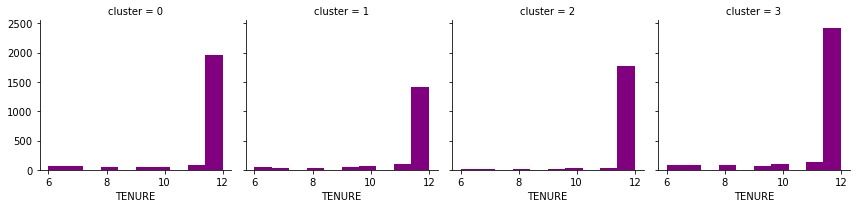

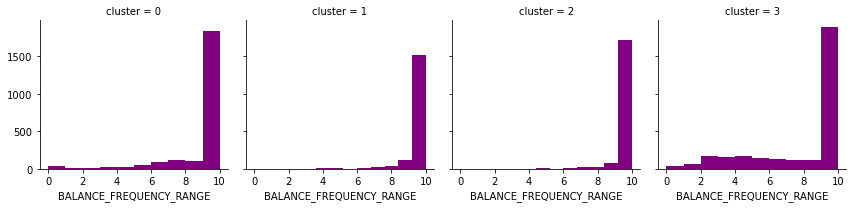

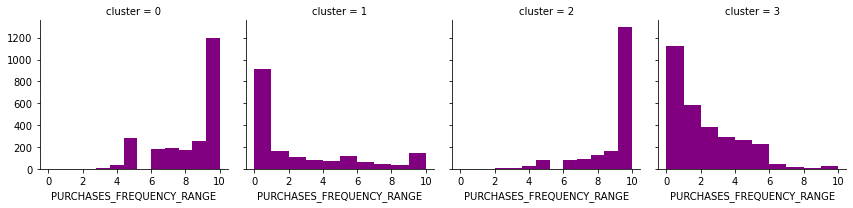

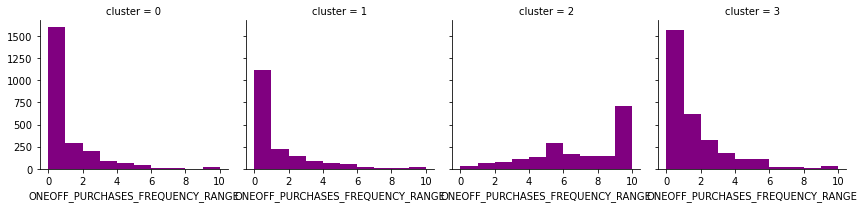

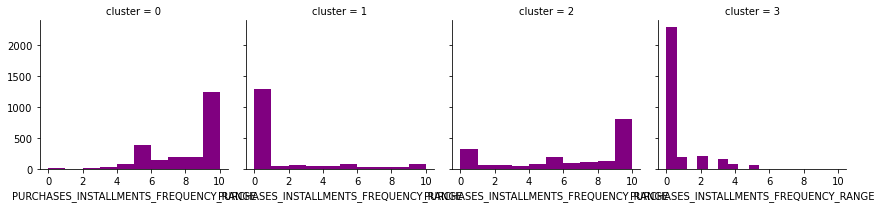

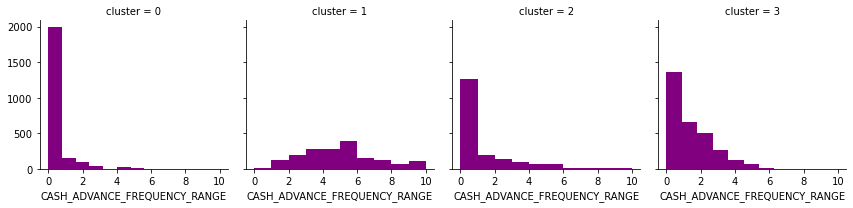

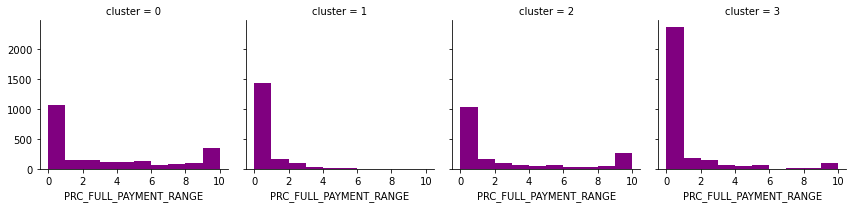

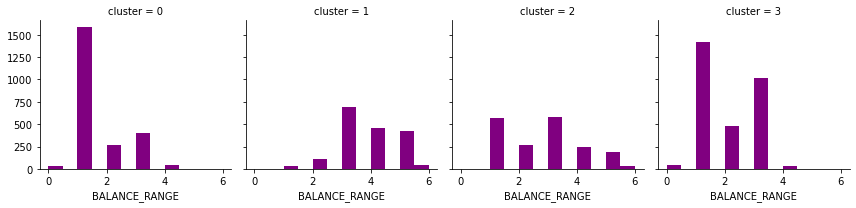

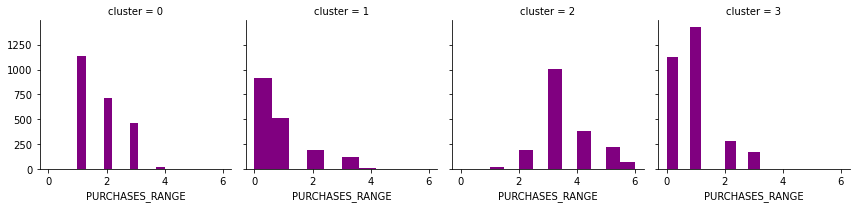

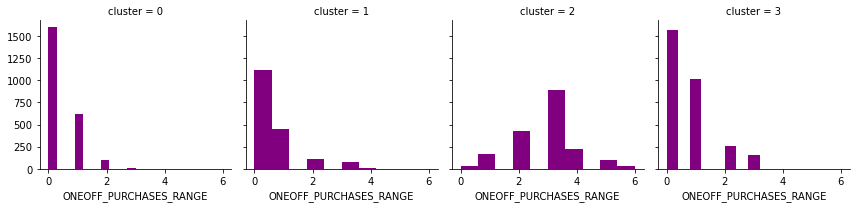

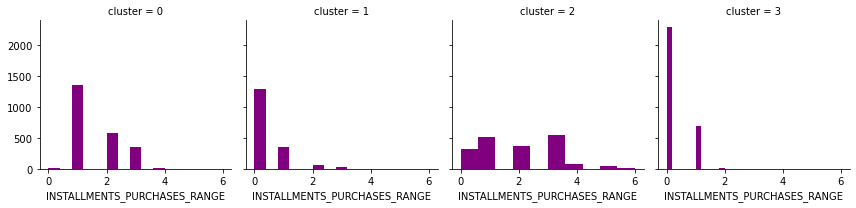

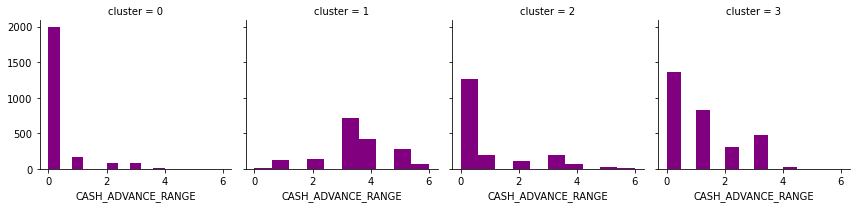

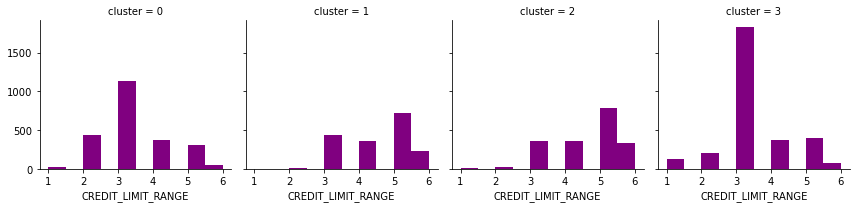

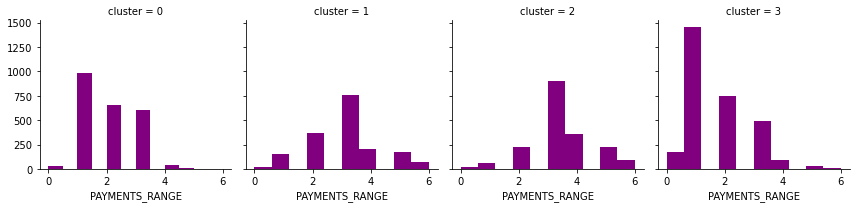

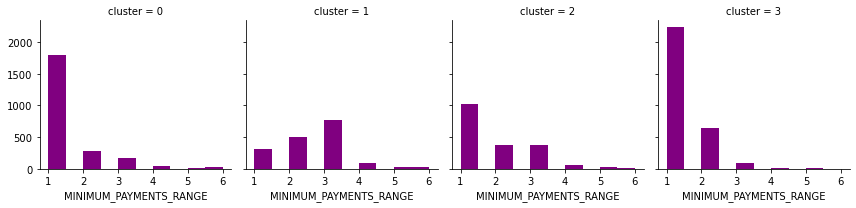

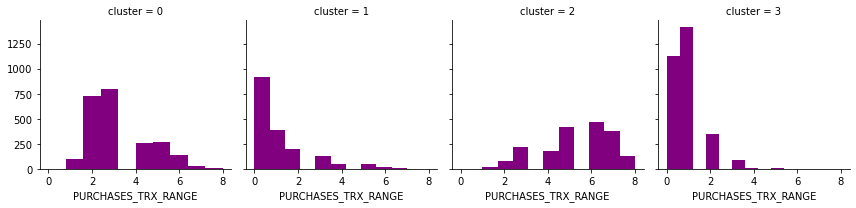

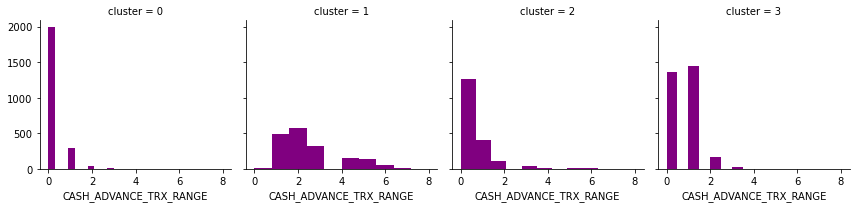

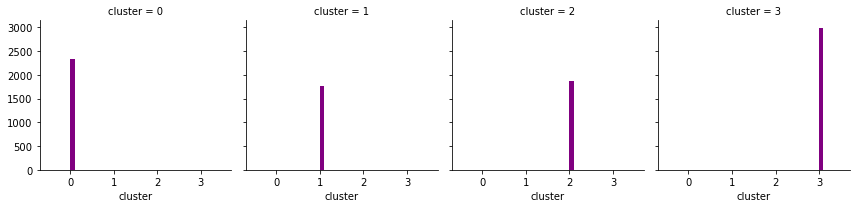

In [67]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c,color='purple')

The PERSONAS that were obtained from the analysis of these clusters are:

* **Cluster0 (The student):** Spends moderate (books, living expenses,etc), buys almost everything through installments, credit limit low and pays small amounts

* **Cluster1 (The single):** Spends little (living expenses, etc), doesn´t use installments, credit limit really high uses cash for some trips.

* **Cluster2 (The married with kids):** Buys frequently and high amounts, uses installments, and has high credit limit, pays everything in every bill.

* **Cluster3 (The grandpa):** Spends moderate amount to give gifts to grandsons but goes to store not very often, uses little amount of installments, has a moderate credit line, doesn´t pay full amounts every bill, uses cash to give to grandchildren.


## 5. Visualization of Clusters (only 3D)

In [68]:
import plotly.express as px

In [70]:
fig = px.scatter_3d(
    clusters1,
    x="PURCHASES_FREQUENCY",
    y="PURCHASES_INSTALLMENTS_FREQUENCY",
    z="ONEOFF_PURCHASES",
    color="cluster",
    symbol="cluster",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()